<a href="https://colab.research.google.com/github/kitsaws19/quantum/blob/main/Pharmaceutical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/A_Z_medicines_dataset_of_India.csv')
df

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
...,...,...,...,...,...,...,...,...,...
41785,41786,Cefastar-CV 200 Tablet,340.00,False,Mankind Pharma Ltd,allopathy,strip of 10 tablets,Cefpodoxime Proxetil (200mg),Clavulanic Acid (125mg)
41786,41787,Celtos-D Syrup,58.00,False,Beepharma Healthcare (Opc) Pvt Ltd,allopathy,bottle of 60 ml Syrup,Phenylephrine (5mg/5ml),Chlorpheniramine Maleate (2mg/5ml)
41787,41788,Citisep-Plus Tablet,586.00,False,Sepik Life Sciences,allopathy,strip of 10 tablets,Citicoline (500mg),Piracetam (800mg)
41788,41789,Combihale FF 100 DPI Capsule,254.00,False,Mankind Pharma Ltd,allopathy,bottle of 30 capsules,Formoterol (6mcg),Fluticasone Propionate (100mcg)


In [ ]:
avg_price=df["price(₹)"].astype("float").mean()
avg_price

284.4666326872457

In [ ]:
print("Number of Medicines above average are:")
above_average=df[df["price(₹)"]>avg_price]
print(len(above_average))

Number of Medicines above average are:
3343


In [ ]:
print("Number of Medicines below average are: ")
below_average=df[df["price(₹)"]<avg_price]
print(len(below_average))

Number of Medicines below average are: 
38447


In [ ]:
company_mean_prices = df.groupby('manufacturer_name')['price(₹)'].mean()

highest_price_company = company_mean_prices.idxmax()
highest_mean_price = company_mean_prices.max()

print(f"The company with the highest mean price is {highest_price_company}.")
print(f"The highest mean price is {highest_mean_price:.2f}.")

The company with the highest mean price is Eli Lilly and Company India Pvt Ltd.
The highest mean price is 70407.00.


In [ ]:
lowest_price_company = company_mean_prices.idxmin()
lowest_mean_price = company_mean_prices.min()

print(f"The company with the lowest mean price is {lowest_price_company}.")
print(f"The lowest mean price is {lowest_mean_price:.2f}.")

The company with the lowest mean price is Healthy Life Pharma Pvt Ltd.
The lowest mean price is 2.00.


In [ ]:
lowest_price_company = company_mean_prices.idxmin()
lowest_mean_price = company_mean_prices.min()

print(f"The company with the lowest mean price is {lowest_price_company}.")
print(f"The lowest mean price is {lowest_mean_price:.2f}.")

In [ ]:

target_price =2.0

# Filter data for the specified company and target price
filtered_data = df[(df['manufacturer_name'] =='Healthy Life Pharma Pvt Ltd' ) & (df['price(₹)'] == target_price)]

# Check if there are any matching rows
if not filtered_data.empty:
    # Print the filtered data
    print(f"Medicines sold by Healthy Life Pharma Pvt Ltd at price 2.0 rupees:")
    print(filtered_data[['name', 'price(₹)']])
else:
    print(f"No medicines found for {specified_company} at price of 2 rupees.")

Medicines sold by Healthy Life Pharma Pvt Ltd at price 2.0 rupees:
                         name  price(₹)
30741  Broxine 2mg/8mg Tablet       2.0


In [ ]:
target_price = 2.0

filtered_data = df[df['price(₹)'] == target_price]


print("Displaying name of all companies and name of that medicine which is sold at the given target price")
if not filtered_data.empty:
    # Group data by Company
    grouped_data = filtered_data.groupby('manufacturer_name')['name'].apply(list)

    # Iterate through the groups and print the company and medicines

    for company, medicines in grouped_data.items():
        print(f"Company: {company}")
        print(f"Medicines at price {target_price}:")
        for medicine in medicines:
            print(medicine)
        print("\n")
else:
    print(f"No companies found selling medicines at price {target_price}.")


Company: Acichem Laboratories
Medicines at price 2.0:
Aciflam Kid 100mg/125mg Tablet


Company: Bevit Pharmaceuticals Ltd
Medicines at price 2.0:
Antacid Tablet


Company: Bini Laboratories Pvt Ltd
Medicines at price 2.0:
Aspirin 300mg Tablet


Company: Healthy Life Pharma Pvt Ltd
Medicines at price 2.0:
Broxine 2mg/8mg Tablet




Comparing with minimum target price helps in estimating the risk factor and also the minimum capital.

In [ ]:
# Specify the target price for filtering
target_price = 2.0  # Replace with the desired target price

# Filter data for the target price
filtered_data = df[df['price(₹)'] == target_price]

# Check if there are any matching rows
if not filtered_data.empty:
    # Group data by both Type and Company
    grouped_data = filtered_data.groupby(['type', 'manufacturer_name'])['name'].apply(list)

    # Iterate through the groups and print the type, company, and medicines
    for (medicine_type, company), medicines in grouped_data.items():
        print(f"Medicine Type: {medicine_type}")
        print(f"Company: {company}")
        print(f"Medicines at price {target_price}:")
        for medicine in medicines:
            print(medicine)
        print("\n")
else:
    print(f"No companies found selling medicines at price {target_price}.")


Medicine Type: allopathy
Company: Acichem Laboratories
Medicines at price 2.0:
Aciflam Kid 100mg/125mg Tablet


Medicine Type: allopathy
Company: Bevit Pharmaceuticals Ltd
Medicines at price 2.0:
Antacid Tablet


Medicine Type: allopathy
Company: Bini Laboratories Pvt Ltd
Medicines at price 2.0:
Aspirin 300mg Tablet


Medicine Type: allopathy
Company: Healthy Life Pharma Pvt Ltd
Medicines at price 2.0:
Broxine 2mg/8mg Tablet




In [ ]:
homeopathy_data = df[df['type'] == 'homeopathy']

# Check if there are any matching rows
if not homeopathy_data.empty:
    # Get a list of unique company names
    unique_companies = homeopathy_data['manufacturer_name'].unique()

    # Print the list of companies selling Homeopathy medicines
    print("Companies selling Homeopathy medicines:")
    for company in unique_companies:
        print(company)
else:
    print("No companies found selling Homeopathy medicines.")

No companies found selling Homeopathy medicines.


In [ ]:
composition_company_groups = df.groupby('short_composition1')['manufacturer_name'].unique()

# Iterate through the groups and print the composition and unique companies
for composition, companies in composition_company_groups.items():
    print(f"Composition: {composition}")
    print(f"Companies: {', '.join(companies)}")
    print("\n")

Streaming output truncated to the last 5000 lines.
Composition: Mefenamic Acid (500mg)
Companies: Alkem Laboratories Ltd


Composition: Mefenamic Acid (500mg) 
Companies: Aamorb Pharmaceuticals Pvt Ltd, Noel Pharma India Pvt Ltd, Alkem Laboratories Ltd, Atlantis Formulations Pvt Ltd, Biochem Pharmaceutical Industries, Bolivian Healthcare, Cian Health Care Pvt Ltd


Composition: Mefenamic Acid (50mg) 
Companies: Positive Medicare Pvt Ltd, Windlas Biotech Ltd, Day Meddy Pharma, Edymax Lifesciences Private Limited, Anevay Pharmaceuticals Pvt. Ltd., Avunu Life Sciences, Atsun Life Sciences, Adelina Lifesciences, Adept Biocare, Agrim Pharmaceuticals, Ansel Healthcare, Glacia Life Care, Alleviate Pharmaceuticals Pvt. Ltd., Afive Pharma, BestoChem Formulations  India  Ltd, Blubell Pharma, Benedic Pharmaceutical Pvt Ltd, Biosys Medisciences, Bluepipes Healthcare Private Limited, Blesslife healthcare, Kenrox Healthcare Pvt. Ltd


Composition: Mefenamic Acid (50mg/5ml) 
Companies: Axis Labs Pvt 

In [ ]:

# Use the 'Composition' column to count the frequency of each composition
composition_frequency = df['short_composition1'].value_counts()

# Get the composition(s) with the highest frequency (it could be more than one if there's a tie)
most_common_composition = composition_frequency.index[0]
highest_frequency = composition_frequency.iloc[0]

# Print the most common composition and its frequency
print(f"The most common composition is: {most_common_composition}")
print(f"It occurs {highest_frequency} times.")


The most common composition is: Aceclofenac (100mg) 
It occurs 2756 times.


In [ ]:
# Use the 'Composition' column to count the frequency of each composition
composition_frequency = df['short_composition1'].value_counts()

# Get the composition(s) with the lowest frequency (it could be more than one if there's a tie)
least_common_composition = composition_frequency.index[-1]
lowest_frequency = composition_frequency.iloc[-1]

# Print the least common composition and its frequency
print(f"The least common composition is: {least_common_composition}")
print(f"It occurs {lowest_frequency} times.")


The least common composition is: Candesartan (8mg) 
It occurs 1 times.


In [ ]:
composition1_data = df[df['short_composition1'] == 'Aceclofenac (100mg)']

# Check if there are any matching rows
if not composition1_data.empty:
    # Get a list of unique company names
    unique_companies = composition1_data['manufacturer_name'].unique()

    # Print the list of companies selling Homeopathy medicines
    print("Companies selling Aceclofenac (100mg) composition medicines:")
    for company in unique_companies:
        print(company)
else:
    print("No companies found selling Aceclofenac (100mg) composition medicines.")

Companies selling Aceclofenac (100mg) composition medicines:
Aristo Pharmaceuticals Pvt Ltd
Medley Pharmaceuticals
Lupin Ltd
Cadila Pharmaceuticals Ltd
Unison Pharmaceuticals Pvt Ltd
FDC Ltd
Lesanto Laboratories
MMC Healthcare Ltd
PCI Pharmaceuticals
Pharmatech Healthcare
Sun Pharmaceutical Industries Ltd
Solvis Pharmaceuticals
Abia Pharmaceuticals Pvt. Ltd.
Boots Lifesciences Ltd
Aust Ind Labs
Jackson Laboratories Pvt Ltd
Talent Healthcare
Medichem Pharmceuticals Ltd
Injecto Capta Pvt Ltd
Zee Laboratories
Tavis Lifecare
Ind Swift Laboratories Ltd
Morepen Laboratories Ltd
Zeelab Pharmacy Pvt Ltd
Aishwarya Healthcare
Anthus Pharmaceuticals Pvt Ltd
Parasol Laboratories
Roussel Laboratories Pvt Ltd
Welcure Pharma
Shield Health Care Pvt Ltd
Intas Pharmaceuticals Ltd
East West Pharma
Pharmasynth Formulations Ltd
Adcock Ingram Healthcare Pvt Ltd
Macleods Pharmaceuticals Pvt Ltd
Bharti Life Sciences
Crest Pharma Pvt Ltd
Chicky Pharma Pvt  Ltd
Knoll Pharmaceuticals Ltd
B L Pharma Limited
Pride

In [ ]:
y = df.groupby('manufacturer_name')['price(₹)'].sum()
x =df[df['short_composition1'] == 'Aceclofenac (100mg)']

In [ ]:
x

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
310,311,Aceclo Tablet,52.55,False,Aristo Pharmaceuticals Pvt Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
545,546,Acenac Tablet,45.50,False,Medley Pharmaceuticals,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
800,801,Acemiz 100mg Tablet,67.00,False,Lupin Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
933,934,Acenext 100mg Tablet,24.50,False,Cadila Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
1397,1398,Akilos Tablet MR,32.70,False,Unison Pharmaceuticals Pvt Ltd,allopathy,strip of 10 tablet mr,Aceclofenac (100mg),NaN
...,...,...,...,...,...,...,...,...,...
23505,23506,Aceclocare 100mg Tablet,22.00,False,Bindlysh Biotec Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
23522,23523,Advark 100mg Tablet SR,23.00,False,Edward Young Labs,allopathy,strip of 10 tablet sr,Aceclofenac (100mg),NaN
24198,24199,Acecloace 100mg Tablet,33.50,False,Parenteral Drugs India Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN
25541,25542,Aneed 100mg Tablet,25.00,True,Slaney Healthcare,allopathy,strip of 10 tablets,Aceclofenac (100mg),NaN


In [ ]:
y

manufacturer_name
10 Drug Mart                            60.00
3A Pharmaceuticals                     191.00
3D Healthcare                          618.00
4Care Lifescience Pvt Ltd             1602.44
911 Dermatology Pvt Ltd                300.00
                                       ...   
Zytras Life Sciences                   848.00
Zyvieon Healthcare Private Limited     178.00
e-derma  Pharma India Pvt. Ltd.        607.68
kalal & Saiyed Pharma Pvt Ltd          119.00
savoy Biotech                          132.38
Name: price(₹), Length: 4643, dtype: float64

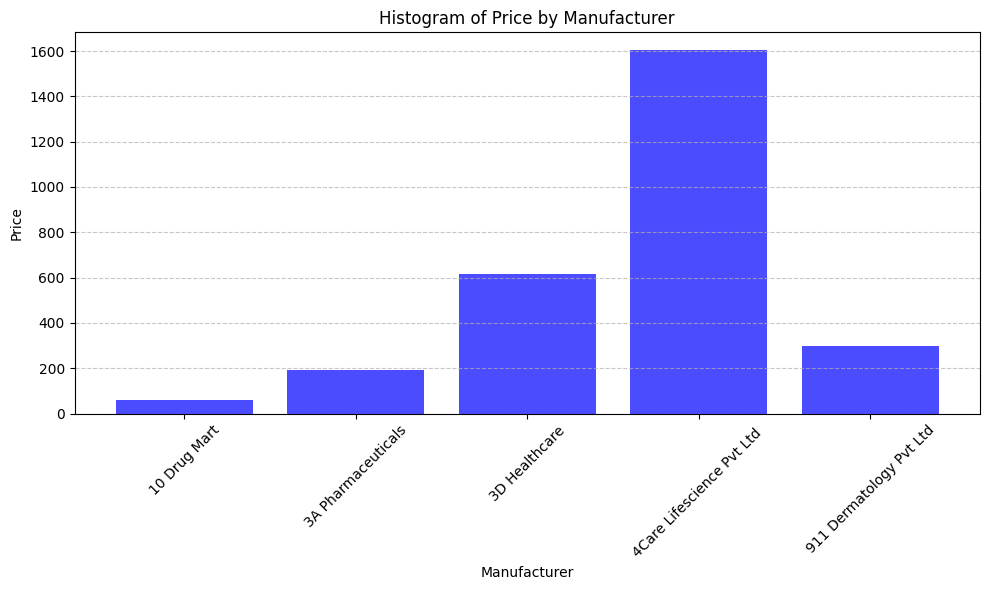

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual dataset)
data = {
    "manufacturer": ['10 Drug Mart', '3A Pharmaceuticals', '3D Healthcare', '4Care Lifescience Pvt Ltd ', '911 Dermatology Pvt Ltd'],
    "price": [ 60.00, 191.00,618.00,1602.44,300.00]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(df['manufacturer'], df['price'], color='blue', alpha=0.7)
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.title("Histogram of Price by Manufacturer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.tight_layout()
plt.show()


Aceclofenac is an important derivative because it is most frequently used among pharmaceutical companies. Therfore, it affects the average pricing and plays essential role in controllinf the futures and options. We need to sort companies based on it.